In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease

In [2]:
data=pd.read_csv('./heart_cleveland_upload.csv')
df=data.copy()

        ## ANALYSE DE FORME
           TARGET :  condition
           LINGE COLONE :  297 x 13
           TYPES DE VARS : 13 int |  1 float
           ANALYSE DE VAR MANQ : non valeur manquants
        ## ANALYSE DE FOND
                   VISUAL DE TARGET :53% du cas negative et 47% positive
            RELATION VAR ET TARGET:
                     trestbps / condition : il m'apparait quand le trestbps augmente alors le probabilites d'etre maladie plus grands

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<AxesSubplot:>

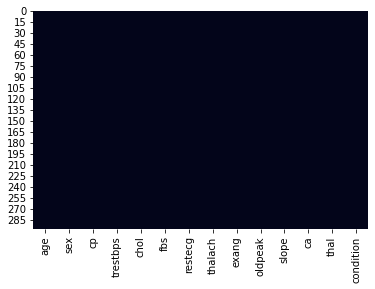

In [4]:
plt.figure()
sns.heatmap(df.isna(),cbar=False)

In [5]:
df[df['condition']==0].count()/df.count()

age          0.538721
sex          0.538721
cp           0.538721
trestbps     0.538721
chol         0.538721
fbs          0.538721
restecg      0.538721
thalach      0.538721
exang        0.538721
oldpeak      0.538721
slope        0.538721
ca           0.538721
thal         0.538721
condition    0.538721
dtype: float64

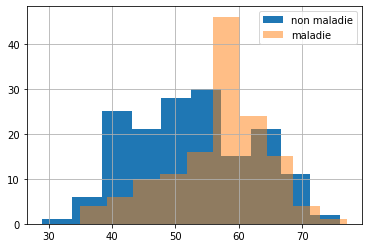

In [6]:
plt.figure()
df['age'][df['condition']==0].hist()
df['age'][df['condition']==1].hist(alpha=0.5)
plt.legend(['non maladie', 'maladie'])
plt.show()

In [7]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

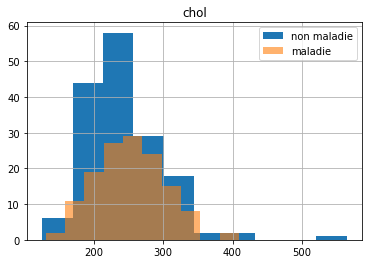

In [8]:
col='chol'
plt.figure()
plt.title(col)
df[col][df['condition']==0].hist()
df[col][df['condition']==1].hist(alpha=0.6)
plt.legend(['non maladie', 'maladie'])


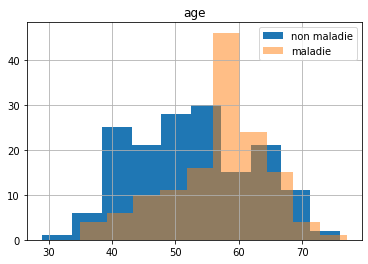

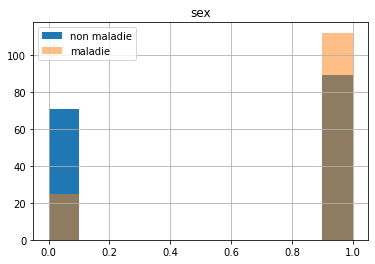

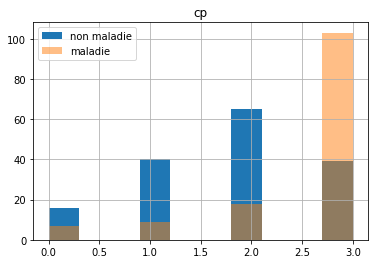

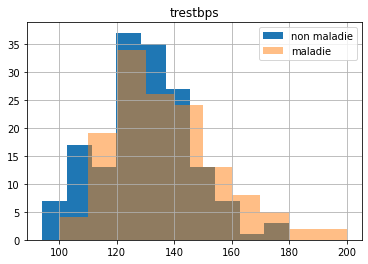

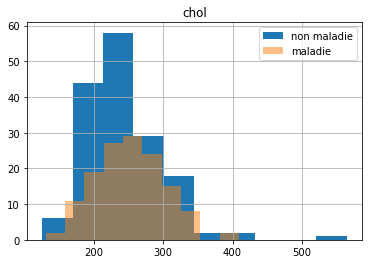

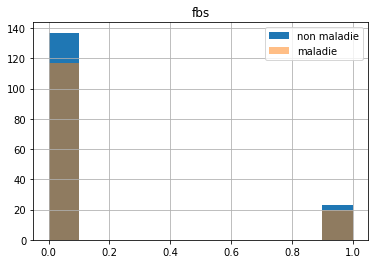

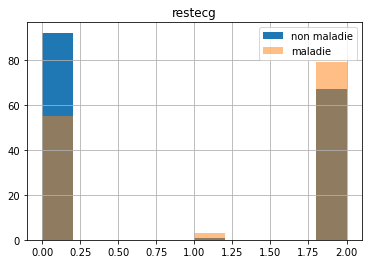

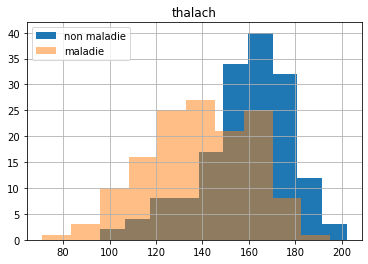

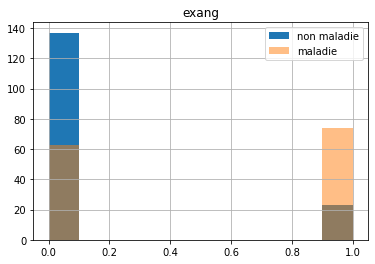

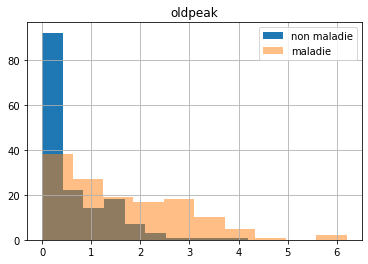

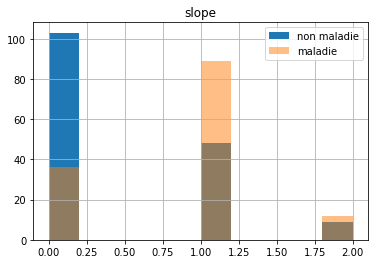

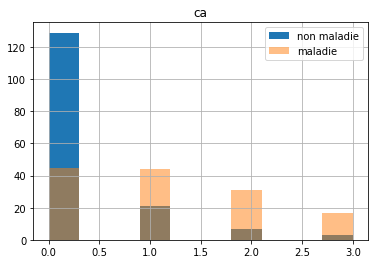

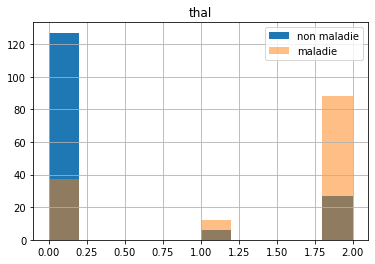

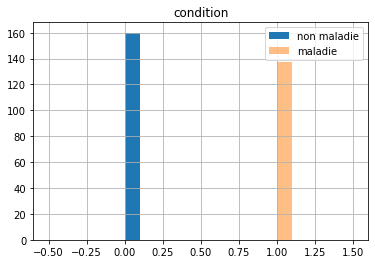

In [9]:
for col in df.columns:
    plt.figure()
    plt.title(col)
    df[col][df['condition']==0].hist()
    df[col][df['condition']==1].hist(alpha=0.5)
    plt.legend(['non maladie', 'maladie'])


# cleaning de data et training de model


In [10]:
import imp
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , confusion_matrix , classification_report
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import naive_bayes,tree
def proce(df):
    df=df.drop(['age','restecg','trestbps','chol','thalach'],axis=1)
    trainset , testset = train_test_split(df,test_size=0.2,random_state=0)
    X=trainset.drop('condition',axis=1)
    Y=trainset['condition']
    X_test=testset.drop('condition',axis=1)
    Y_test=testset['condition']
    return X,Y,X_test,Y_test





In [11]:
X,Y,X_test,Y_test=proce(df)


In [12]:
def trainmodel(sk_mod):
    model=sk_mod
    model.fit(X,Y)

    return model

In [13]:

from sklearn.model_selection import learning_curve
import numpy as np
def eval(model):
    print('le score est :',model.score(X_test,Y_test))
    print(confusion_matrix(Y_test,model.predict(X_test)))
    print(classification_report(Y_test,model.predict(X_test)))


def eval_pip(model):
    model.fit(X,Y)
    print('le score est :',model.score(X_test,Y_test))
    print(confusion_matrix(Y_test,model.predict(X_test)))
    print(classification_report(Y_test,model.predict(X_test)))
    N , train_score , val_score = learning_curve(model,X,Y,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()
    plt.show()



In [14]:
model=trainmodel(SVC(kernel='linear'))
eval(model)




le score est : 0.8333333333333334
[[21  1]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60



In [15]:
model=trainmodel(linear_model.LogisticRegression())
eval(model)


le score est : 0.8333333333333334
[[20  2]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.94      0.79      0.86        38

    accuracy                           0.83        60
   macro avg       0.83      0.85      0.83        60
weighted avg       0.86      0.83      0.84        60



In [16]:
model=trainmodel(naive_bayes.GaussianNB())
eval(model)


le score est : 0.85
[[20  2]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.94      0.82      0.87        38

    accuracy                           0.85        60
   macro avg       0.84      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60



In [17]:
model=trainmodel(tree.DecisionTreeClassifier())
eval(model)


le score est : 0.75
[[18  4]
 [11 27]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71        22
           1       0.87      0.71      0.78        38

    accuracy                           0.75        60
   macro avg       0.75      0.76      0.74        60
weighted avg       0.78      0.75      0.75        60



In [18]:
from sklearn.neural_network import MLPClassifier

model=trainmodel(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
eval(model)


le score est : 0.75
[[19  3]
 [12 26]]
              precision    recall  f1-score   support

           0       0.61      0.86      0.72        22
           1       0.90      0.68      0.78        38

    accuracy                           0.75        60
   macro avg       0.75      0.77      0.75        60
weighted avg       0.79      0.75      0.75        60



d:\programe\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier

def mod_pip(model):
    preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=True),SelectKBest(f_classif,k=5))
    svc_model = make_pipeline(StandardScaler(),model)
    eval_pip(model)



RandomForestClassifier(random_state=0)
le score est : 0.7666666666666667
[[18  4]
 [10 28]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        22
           1       0.88      0.74      0.80        38

    accuracy                           0.77        60
   macro avg       0.76      0.78      0.76        60
weighted avg       0.79      0.77      0.77        60



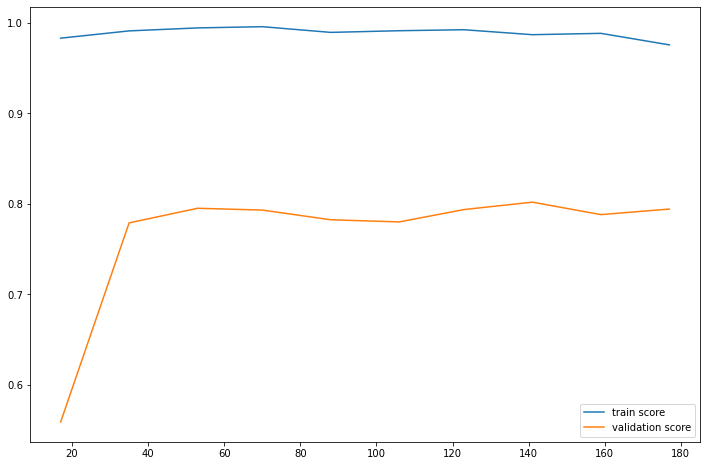

SVC(random_state=0)
le score est : 0.7833333333333333
[[21  1]
 [12 26]]
              precision    recall  f1-score   support

           0       0.64      0.95      0.76        22
           1       0.96      0.68      0.80        38

    accuracy                           0.78        60
   macro avg       0.80      0.82      0.78        60
weighted avg       0.84      0.78      0.79        60



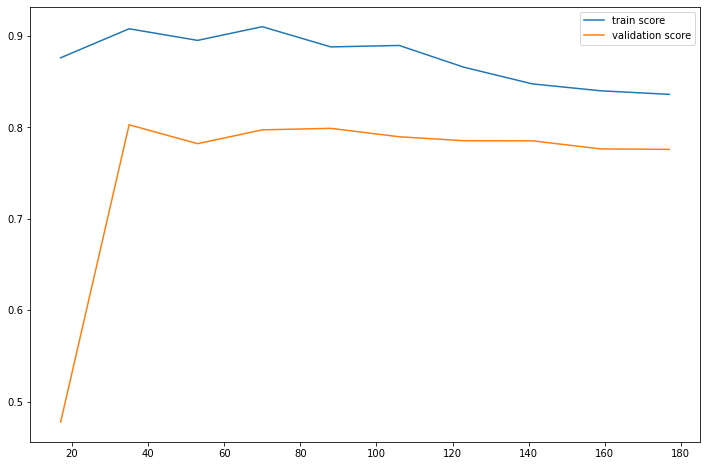

SVC(kernel='linear', random_state=0)
le score est : 0.8333333333333334
[[21  1]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60



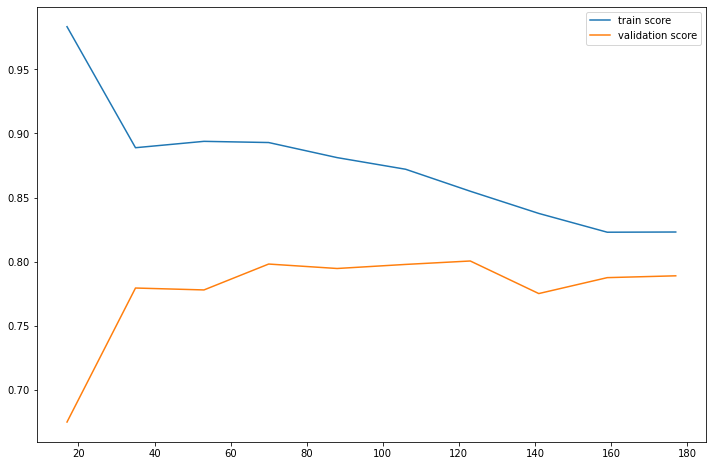

LogisticRegression(random_state=0)
le score est : 0.8333333333333334
[[20  2]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.94      0.79      0.86        38

    accuracy                           0.83        60
   macro avg       0.83      0.85      0.83        60
weighted avg       0.86      0.83      0.84        60



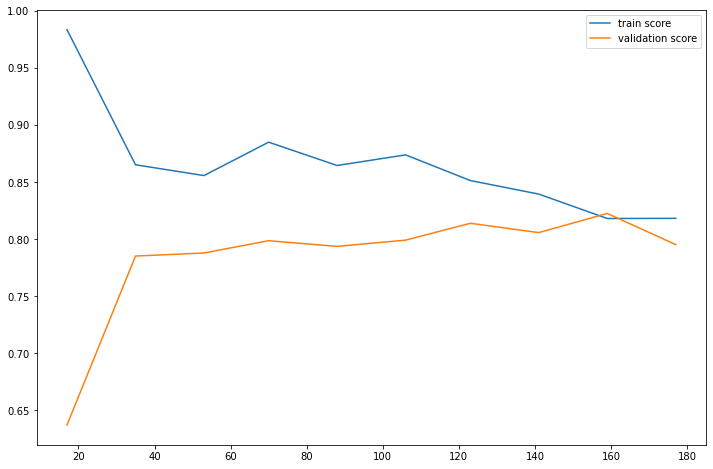

GaussianNB()
le score est : 0.85
[[20  2]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.94      0.82      0.87        38

    accuracy                           0.85        60
   macro avg       0.84      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60



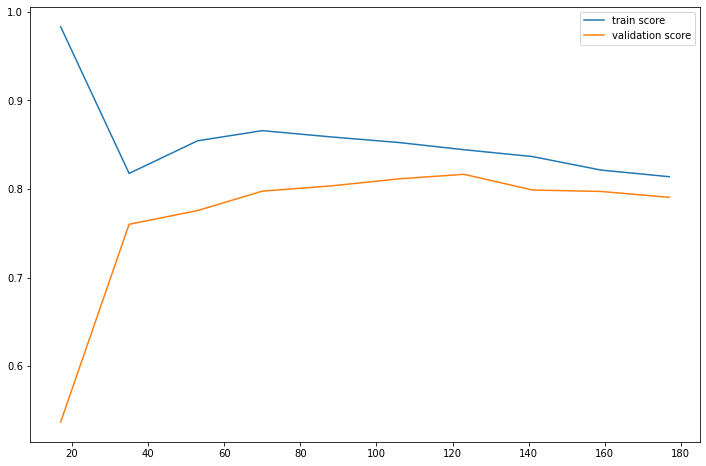

DecisionTreeClassifier(random_state=0)
le score est : 0.7333333333333333
[[18  4]
 [12 26]]
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        22
           1       0.87      0.68      0.76        38

    accuracy                           0.73        60
   macro avg       0.73      0.75      0.73        60
weighted avg       0.77      0.73      0.74        60



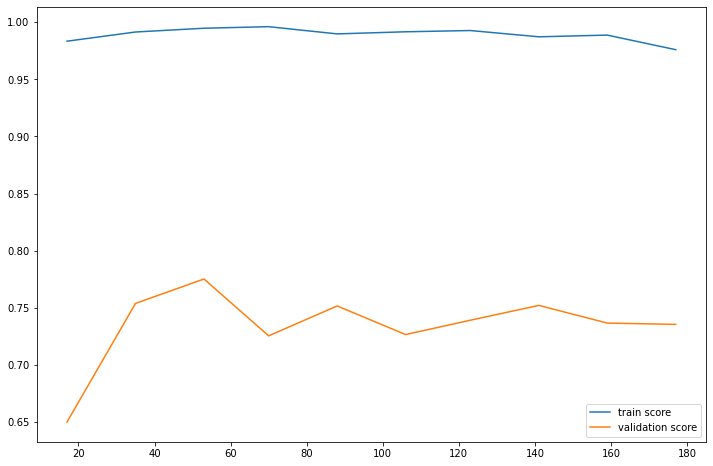

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=0,
              solver='lbfgs')


d:\programe\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


le score est : 0.7833333333333333
[[21  1]
 [12 26]]
              precision    recall  f1-score   support

           0       0.64      0.95      0.76        22
           1       0.96      0.68      0.80        38

    accuracy                           0.78        60
   macro avg       0.80      0.82      0.78        60
weighted avg       0.84      0.78      0.79        60



d:\programe\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\programe\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\programe\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

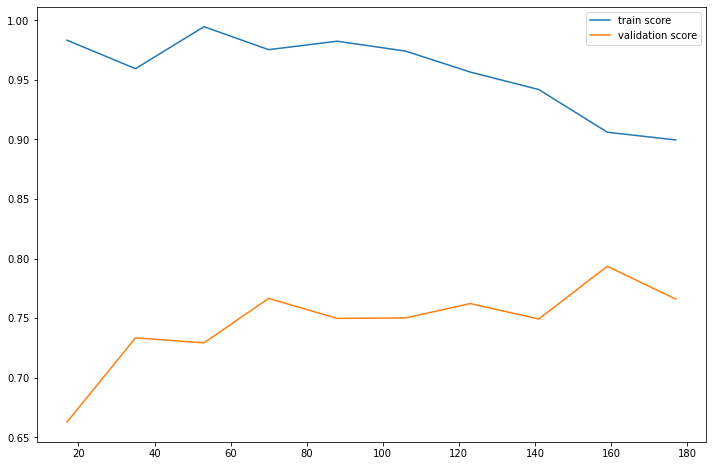

In [20]:
l=[RandomForestClassifier(random_state=0),SVC(random_state=0),SVC(kernel='linear',random_state=0),linear_model.LogisticRegression(random_state=0),
naive_bayes.GaussianNB(),tree.DecisionTreeClassifier(random_state=0)
,MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=0)]
for i in l:
    print(i)
    mod_pip(i)

# OPTIMIZATIONS

In [26]:
def mod_pip2(model):
    preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=True),SelectKBest(f_classif,k=5))
    svc_model = make_pipeline(StandardScaler(),model)
    return svc_model



In [142]:

hyper_parms = {
    'gaussiannb__var_smoothing': np.logspace(1e-9,1e-10, num=100),

}

In [143]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(mod_pip2(naive_bayes.GaussianNB()),hyper_parms,scoring='f1',cv=4,n_iter=40)

grid

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gaussiannb', GaussianNB())]),
                   n_iter=40,
                   param_distributions={'gaussiannb__var_smoothing': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])},
                   scoring='f1')

In [144]:
grid.fit(X,Y)
print(grid.best_params_)
y_pred =grid.predict(X_test)
print(classification_report(Y_test,y_pred))

{'gaussiannb__var_smoothing': 1.0000000019885962}
              precision    recall  f1-score   support

           0       0.65      0.91      0.75        22
           1       0.93      0.71      0.81        38

    accuracy                           0.78        60
   macro avg       0.79      0.81      0.78        60
weighted avg       0.83      0.78      0.79        60



In [145]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__standardscaler', 'estimator__gaussiannb', 'estimator__standardscaler__copy', 'estimator__standardscaler__with_mean', 'estimator__standardscaler__with_std', 'estimator__gaussiannb__priors', 'estimator__gaussiannb__var_smoothing', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [151]:
from sklearn.metrics import precision_recall_curve

In [155]:
precision,recall , threshold=precision_recall_curve(Y_test, grid.best_estimator_.predict(X_test))

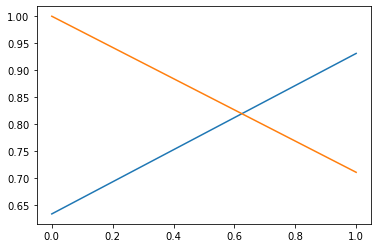

In [156]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')